In [1]:
using LinearAlgebra
using Random
rng = MersenneTwister()
Random.seed!(rng, 2018)
output = false
;

In [2]:
# Size of the matrix
n = 24;

In [3]:
include("../src/getrf.jl")

getrs (generic function with 3 methods)

In [4]:
# Initialize matrix
d = (1.0/2.0).^(n-1:-1:0)
Q, = qr(rand(n,n))
A = Q * diagm(0 => d);

In [5]:
# Testing rook pivoting kernel
b = rand(n)
x1 = (A1 = copy(A); P = getrf!(A1); getrs(A1, P, b))
x2 = (A1 = copy(A); (P_row, P_col) = getrfRook!(A1); getrs(A1, P_row, P_col, b))
@show norm(x1-x2)/norm(x2)
norm(x1-x2)/norm(x2) < 1e2*eps(Float64) ? "TEST PASSED" : "TEST FAILED"

norm(x1 - x2) / norm(x2) = 2.3055095076400537e-16


"TEST PASSED"

In [6]:
dA = Array{Float64}(undef,n,3)
A1 = copy(A)
@time getrf!(A1)
dA[:,1] = abs.(diag(A1))

A1 = copy(A)
@time getrfRook!(A1)
dA[:,2] = abs.(diag(A1));

# These are the sorted singular values of the matrix
dA[:,3] = sort(d)[n:-1:1]; 

  0.000023 seconds (121 allocations: 15.641 KiB)
  0.000031 seconds (199 allocations: 36.438 KiB)


In [7]:
include("../load_plot_pkg.jl")

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-11417591307773001046\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-1599665603162221182\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-11417591307773001046\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

plotToPDF (generic function with 1 method)

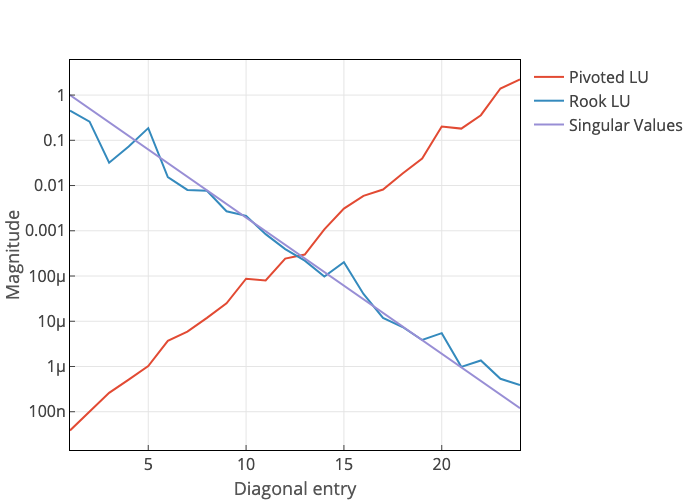

In [8]:
t1 = scatter(x=1:n,y=dA[:,1],name="Pivoted LU")
t2 = scatter(x=1:n,y=dA[:,2],name="Rook LU")
t3 = scatter(x=1:n,y=dA[:,3],name="Singular Values")
l = Layout(yaxis_type="log",xaxis_title="Diagonal entry",yaxis_title="Magnitude",
    height=350,width=550,margin=attr(l=70))
p = plot([t1, t2, t3],l)

In [9]:
if output
    plotToPDF(p,"fig_rook_pivoting")
end